<a href="https://colab.research.google.com/github/hodzicc/ColabNotebooks-AI/blob/main/LV6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Učitati CIFAR-10 skup podataka, i ispisati oblik trening i test podataka i labela;

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np

# Učitaj skup podataka
(trainX, trainy), (testX, testy) = cifar10.load_data()

# Ispis oblika podataka
print("Oblik trening podataka:", trainX.shape)
print("Oblik trening labela:", trainy.shape)
print("Oblik test podataka:", testX.shape)
print("Oblik test labela:", testy.shape)

170498071/170498071 [==============================] - 13s 0us/step
Oblik trening podataka: (50000, 32, 32, 3)
Oblik trening labela: (50000, 1)
Oblik test podataka: (10000, 32, 32, 3)
Oblik test labela: (10000, 1)


b) Pomoću Matplotlib (tj. pyplot) iscrtati prvih 9 slika ovog skupa podataka. Šta možete reći o slikama? Da li ova
rezolucija odgovara rezoluciji modernih fotografija? Kako bi rezolucija slike mogla djelovati na rad algoritama
i modela mašinskog učenja prilikom klasifikacije?

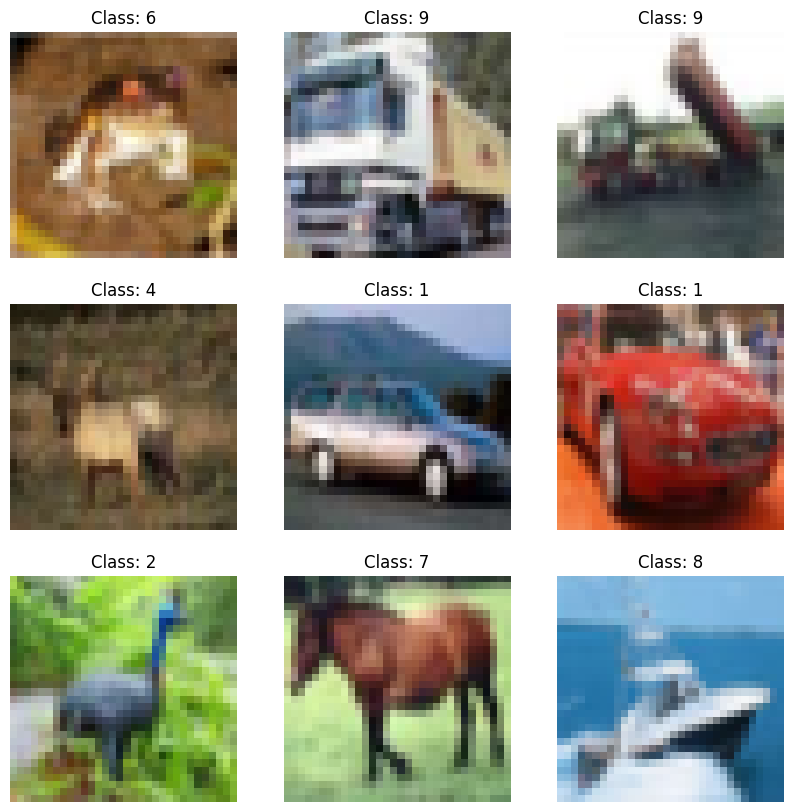

In [ ]:
# Prikaz prvih 9 slika iz skupa podataka
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(trainX[i])
    plt.title(f'Class: {trainy[i, 0]}')
    plt.axis('off')
plt.show()

c) Pripremiti podatke za treniranje. Za labele, potrebno je koristiti funkciju to_categorical, dok je za trening
podatke potrebno koristiti astype za pretvorbu u floating-point tip, te dijeljenje sa 255 za korak skaliranja
podataka.

In [ ]:
# Pretvaranje labela u one-hot enkodirane vektore
trainY = to_categorical(trainy)
testY = to_categorical(testy)

# Pretvaranje slika u floating-point i normalizacija
trainX = trainX.astype('float32') / 255.0
testX = testX.astype('float32') / 255.0

d) Definisati pomoćnu funkciju za kreiranje modela. Za sada, funkcija će praviti jednostavan CNN (ovo se još
naziva i baseline model). Model treba imati sljedeće slojeve:
• Conv2D sloj sa 32 filtera, dimenzija 3×3, sa uključenim padding-om;
• Conv2D sloj sa 32 filtera, dimenzija 3×3, sa uključenim padding-om;
• MaxPooling2D sloj dimenzija 2×2;
• Conv2D sloj sa 64 filtera, dimenzija 3×3, sa uključenim padding-om;
• Conv2D sloj sa 64 filtera, dimenzija 3×3, sa uključenim padding-om;
• MaxPooling2D sloj dimenzija 2×2;
• Flatten sloj;
• Dense sloj sa 128 neurona, koji koristi relu aktivacijsku funkciju;
• Izlazni Dense sloj sa 10 neurona i softmax aktivacijskom funkcijom.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import SGD

def define_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

# Kreiranje modela
model = define_model()

e) Dodati potrebni kod za kompajliranje modela u funkciju define_model. Optimizator treba biti gradient
descent uz stopu učenja od 0.001 i momentum od 0.9, to jeste:

opt = SGD(lr=0.001, momentum=0.9)

Kompajliranje se treba vršiti na način da se za funkciju gubitka koristi categorical_crossentropy, a za
metrike accuracy. Liniju za kompajliranje modela dodati na kraj pomoćne funkcije. Optimizator treba biti
SGD definisan u prethodnom podzadatku.
Sada je potrebno istrenirati model. Parametri koji će biti korišteni za treniranje su sljedeći:
• epochs=15;
• batch_size=64;
• validation_data=(testX, testY) (obično bi se kreirao poseban skup za validaciju, ali u ovom primjeru
ćemo koristiti testni skup);

In [ ]:
def define_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model


# Kreiranje modela
model = define_model()

# Parametri za treniranje
epochs = 15
batch_size = 64

# Treniranje modela
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_data=(testX, testY), verbose=2)

Epoch 1/15
782/782 - 7s - loss: 1.6709 - accuracy: 0.3942 - val_loss: 1.4415 - val_accuracy: 0.4844 - 7s/epoch - 9ms/step
Epoch 2/15
782/782 - 4s - loss: 1.1585 - accuracy: 0.5885 - val_loss: 1.0070 - val_accuracy: 0.6460 - 4s/epoch - 6ms/step
Epoch 3/15
782/782 - 5s - loss: 0.9169 - accuracy: 0.6773 - val_loss: 0.8900 - val_accuracy: 0.6841 - 5s/epoch - 6ms/step
Epoch 4/15
782/782 - 5s - loss: 0.7519 - accuracy: 0.7358 - val_loss: 0.8722 - val_accuracy: 0.6983 - 5s/epoch - 6ms/step
Epoch 5/15
782/782 - 5s - loss: 0.6243 - accuracy: 0.7815 - val_loss: 0.8455 - val_accuracy: 0.7078 - 5s/epoch - 6ms/step
Epoch 6/15
782/782 - 5s - loss: 0.5146 - accuracy: 0.8202 - val_loss: 0.8848 - val_accuracy: 0.7197 - 5s/epoch - 6ms/step
Epoch 7/15
782/782 - 5s - loss: 0.4189 - accuracy: 0.8517 - val_loss: 0.9126 - val_accuracy: 0.7284 - 5s/epoch - 6ms/step
Epoch 8/15
782/782 - 5s - loss: 0.3238 - accuracy: 0.8864 - val_loss: 0.9889 - val_accuracy: 0.7224 - 5s/epoch - 6ms/step
Epoch 9/15
782/782 - 5s 

f) Izvršiti treniranje i evaluaciju modela. Kolika je postignuta tačnost? Da li je ovo zadovoljavajuće?

In [ ]:
# Evaluacija modela na test skupu
_, accuracy = model.evaluate(testX, testY, verbose=0)
print(f'Tačnost na test skupu: {accuracy*100:.2f}%')

Tačnost na test skupu: 71.65%


g) Izvršiti plot ponašanja tačnost i i gubitka kroz epohe. Šta možete zaključiti iz plotova?

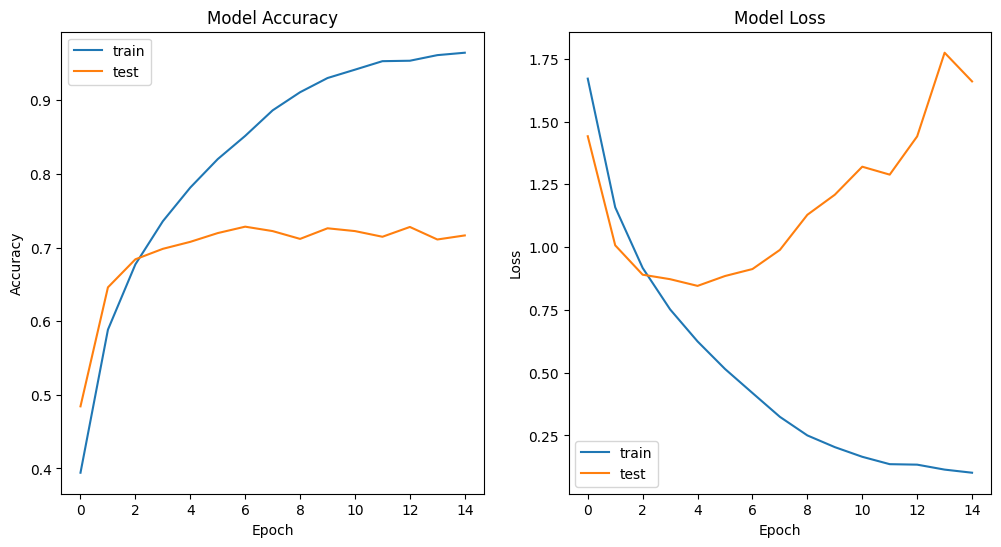

In [ ]:
# Crtanje tačnosti i gubitka kroz epohe
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


h) Dodati Dropout sloj u model, sa vjerovatnoćom od 0.5, prije prvog Dense sloja. Ponoviti treniranje, evalu-
aciju, i plotanje gubitka i tačnosti. Da li su postignuti rezultati bolji? Da li sada nastaje overfitting?

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_25 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_27 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 8, 8, 64)          0         
 ng2D)                                                

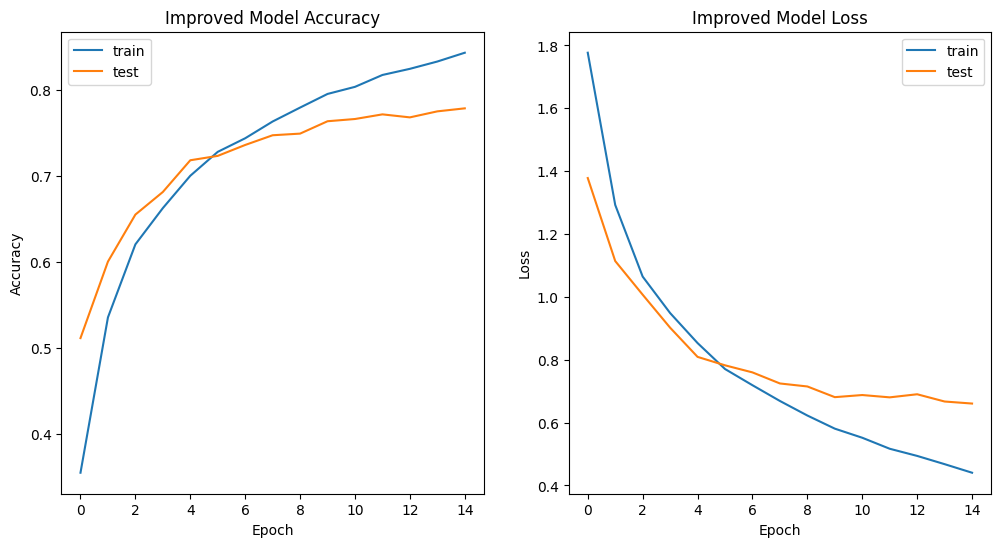

In [ ]:
def define_improved_model():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dropout(0.5),  # Dodatni Dropout sloj prije Dense sloja
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Kreiranje poboljšanog modela
improved_model = define_improved_model()
improved_model.summary()

# Ponovno treniranje poboljšanog modela
history_improved = improved_model.fit(trainX, trainY, epochs=15, batch_size=64, validation_data=(testX, testY), verbose=2)

_, improved_accuracy = improved_model.evaluate(testX, testY, verbose=0)
print(f'Poboljšana tačnost na test skupu: {improved_accuracy*100:.2f}%')

# Plot ponašanja tačnosti i gubitka kroz epohe za poboljšani model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history_improved.history['accuracy'], label='train')
plt.plot(history_improved.history['val_accuracy'], label='test')
plt.title('Improved Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_improved.history['loss'], label='train')
plt.plot(history_improved.history['val_loss'], label='test')
plt.title('Improved Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

i) Sada ćemo napraviti konačnu verziju našeg modela. Nad postojećim modelom, izvršiti sljedeće izmjene:
1) Prije Flatten sloja, dodati još jedan blok od dva Conv2D sloja i jednog MaxPooling2D sloja, po uzoru
na već postojeće blokove. Postaviti broj filtera za dva Conv2D sloja na 128;
2) Postojeći Dropout promijeniti na 0.2, te ga pomjeriti nakon prvog Dense sloja;
3) Nakon svakog MaxPooling2d sloja, dodati Dropout sloj sa vjerovatnoćom 0.2.

In [ ]:
def final_model_define():
    model = Sequential([
        Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
        Conv2D(32, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        Conv2D(64, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        Conv2D(128, (3, 3), padding='same', activation='relu'),
        MaxPooling2D((2, 2)),
        Dropout(0.2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.2),
        Dense(10, activation='softmax')
    ])

    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Kreiranje konačnog modela
final_model = final_model_define()
final_model.summary()

# Treniranje konačnog modela 30 epoha
final_history = final_model.fit(trainX, trainY, epochs=30, batch_size=64, validation_data=(testX, testY), verbose=2)
_, final_accuracy = final_model.evaluate(testX, testY, verbose=0)
print(f'Poboljšana tačnost na test skupu: {final_accuracy*100:.2f}%')


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_28 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 conv2d_29 (Conv2D)          (None, 32, 32, 32)        9248      
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_7 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_30 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_31 (Conv2D)          (None, 16, 16, 64)        36928     
                                                      